In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
train_imgs=mnist.train.images
train_labels=mnist.train.labels

test_imgs=mnist.test.images
test_labels=mnist.test.labels

print(train_imgs.shape)



(55000, 784)


In [0]:
def generator(x):
  dconv1=tf.layers.conv2d_transpose(inputs=x,filters=1024,kernel_size=[4,4],strides=(4,4),padding='SAME',kernel_initializer=tf.initializers.glorot_normal())
  dconv1=tf.layers.batch_normalization(dconv1)
  dconv1=tf.nn.elu(dconv1) # 4 4 1024
  
  dconv2=tf.layers.conv2d_transpose(inputs=dconv1,filters=512,kernel_size=[4,4],strides=(2,2),padding='SAME',kernel_initializer=tf.initializers.glorot_normal())
  dconv2=tf.layers.batch_normalization(dconv2)
  dconv2=tf.nn.elu(dconv2) # 8 8 512
  
  dconv3=tf.layers.conv2d_transpose(inputs=dconv2,filters=256,kernel_size=[4,4],strides=(2,2),padding='SAME',kernel_initializer=tf.initializers.glorot_normal())
  dconv3=tf.layers.batch_normalization(dconv3)
  dconv3=tf.nn.elu(dconv3) # 16 16 256
  
  dconv4=tf.layers.conv2d_transpose(inputs=dconv3,filters=128,kernel_size=[4,4],strides=(2,2),padding='SAME',kernel_initializer=tf.initializers.glorot_normal())
  dconv4=tf.layers.batch_normalization(dconv4)
  dconv4=tf.nn.elu(dconv4) # 32 32 128
  
  dconv5=tf.layers.conv2d_transpose(inputs=dconv4,filters=1,kernel_size=[4,4],strides=(2,2),padding='SAME',activation=tf.nn.tanh,kernel_initializer=tf.initializers.glorot_normal())

  return dconv5

In [0]:
def discriminator(x):
  
  conv1=tf.layers.conv2d(inputs=x,filters=128,kernel_size=[4,4],strides=(2,2),padding='SAME',kernel_initializer=tf.initializers.glorot_normal(),reuse=tf.AUTO_REUSE,name='conv1')
  conv1=tf.nn.elu(conv1)
  
  conv2=tf.layers.conv2d(inputs=conv1,filters=256,kernel_size=[4,4],strides=(2,2),padding='SAME',kernel_initializer=tf.initializers.glorot_normal(),reuse=tf.AUTO_REUSE,name='conv2')
  conv2=tf.layers.batch_normalization(conv2,reuse=tf.AUTO_REUSE,name='bn2')
  conv2=tf.nn.elu(conv2)
  
  conv3=tf.layers.conv2d(inputs=conv2,filters=512,kernel_size=[4,4],strides=(2,2),padding='SAME',kernel_initializer=tf.initializers.glorot_normal(),reuse=tf.AUTO_REUSE,name='conv3')
  conv3=tf.layers.batch_normalization(conv3,reuse=tf.AUTO_REUSE,name='bn3')
  conv3=tf.nn.elu(conv3)
  
  conv4=tf.layers.conv2d(inputs=conv3,filters=1024,kernel_size=[4,4],strides=(2,2),padding='SAME',kernel_initializer=tf.initializers.glorot_normal(),reuse=tf.AUTO_REUSE,name='conv4')
  conv4=tf.layers.batch_normalization(conv4,reuse=tf.AUTO_REUSE,name='bn4')
  conv4=tf.nn.elu(conv4)
 
  
  conv5=tf.layers.conv2d(inputs=conv4,filters=1,kernel_size=[4,4],strides=(4,4),padding='SAME',kernel_initializer=tf.initializers.glorot_normal(),reuse=tf.AUTO_REUSE,name='conv5')
  conv5=tf.nn.sigmoid(conv5)
  
  return conv5

In [0]:
x=tf.placeholder(tf.float32,[None,64,64,1])
y=tf.placeholder(tf.float32,[None,1,1,100])

In [0]:
def get_batch(images,labels,batch_size=100):
  idx=np.random.choice(images.shape[0],batch_size)
  return images[idx],labels[idx]

In [0]:
def get_noise(noise_h,noise_w,noise_ch,batch_size=100):
  return np.random.normal(size=(batch_size,noise_h,noise_w,noise_ch))

In [8]:
gen=generator(y)
dis_f=discriminator(gen)
dis_r=discriminator(x)



Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.conv2d instead.


In [9]:
print(len(tf.trainable_variables()))
print([tf.trainable_variables()[i] for i in range(10)])

34
[<tf.Variable 'conv2d_transpose/kernel:0' shape=(4, 4, 1024, 100) dtype=float32_ref>, <tf.Variable 'conv2d_transpose/bias:0' shape=(1024,) dtype=float32_ref>, <tf.Variable 'batch_normalization/gamma:0' shape=(1024,) dtype=float32_ref>, <tf.Variable 'batch_normalization/beta:0' shape=(1024,) dtype=float32_ref>, <tf.Variable 'conv2d_transpose_1/kernel:0' shape=(4, 4, 512, 1024) dtype=float32_ref>, <tf.Variable 'conv2d_transpose_1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'batch_normalization_1/gamma:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'batch_normalization_1/beta:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'conv2d_transpose_2/kernel:0' shape=(4, 4, 256, 512) dtype=float32_ref>, <tf.Variable 'conv2d_transpose_2/bias:0' shape=(256,) dtype=float32_ref>]


In [0]:
d_loss=tf.reduce_mean(-(tf.log(dis_r)+tf.log(1-dis_f)))
g_loss=tf.reduce_mean(-tf.log(dis_f))
lr_g=0.0001
lr_d=0.00005


g_list=[tf.trainable_variables()[i] for i in range(18)]
d_list=[tf.trainable_variables()[i] for i in range(18,34)]

g_opt=tf.train.AdamOptimizer(lr_g,beta1=0.5).minimize(g_loss,var_list=g_list)
d_opt=tf.train.AdamOptimizer(lr_d,beta1=0.5).minimize(d_loss,var_list=d_list)


sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
train_set = tf.image.resize_images(mnist.train.images.reshape(-1,28,28,1), [64, 64])
train_set = (train_set - 0.5) / 0.5


In [20]:
train_data=sess.run(train_set)
for i in range(20):
  train_x,_=get_batch(train_data,train_labels)
  train_y=get_noise(1,1,100)
  
  _,g_l=sess.run([g_opt,g_loss],feed_dict={y:train_y})
  _,d_l=sess.run([d_opt,d_loss],feed_dict={x:train_x.reshape(-1,64,64,1),y:train_y})
  print(d_l,g_l)

1.3533123 0.69312567
1.0467317 0.6956591
0.86450106 0.6989904
0.7702049 0.701856
0.72652143 0.7053882
0.72081846 0.704979
0.75641406 0.690964
0.8173921 0.6696832
0.9171036 0.63283086
0.90780914 0.6342925
0.88400406 0.65218294
0.8315981 0.73085785
0.7813089 0.83044416
0.79469484 0.8901045
0.7564615 0.86047345
0.72628766 0.8556905
0.6834494 0.86027724
0.64214545 0.88516504
0.63634986 0.8516739
0.63045406 0.8575031


In [25]:
test_noise=get_noise(1,1,100,batch_size=1)
print(test_noise.shape)

test_gen=sess.run(gen,feed_dict={y:test_noise})
print(test_gen.shape)

(1, 1, 1, 100)
(1, 64, 64, 1)


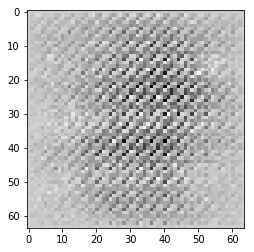

In [26]:
plt.imshow(test_gen.reshape(64,64),'gray')

In [16]:
dconv1,dconv2,dconv3=generator(y)
conv1,conv2,conv3=discriminator(x)
print(dconv1.get_shape())
print(dconv2.get_shape())
print(dconv3.get_shape())
#print(sess.run([dconv1,dconv2,dconv3,dconv4,dconv5],feed_dict={y:train_y}))

print(conv1.get_shape())
print(conv2.get_shape())
print(conv3.get_shape())


TypeError: ignored